In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [380]:
df =pd.read_csv(r"C:\Users\hp\Desktop\Imarticus\Machine learning\Logistic Regression\churn2.csv")

In [381]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [383]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [384]:
df.TotalCharges.value_counts(dropna=False)

TotalCharges
20.20      11
NaN        11
19.75       9
19.65       8
19.90       8
           ..
1990.50     1
7362.90     1
346.45      1
306.60      1
108.15      1
Name: count, Length: 6531, dtype: int64

In [385]:
df.TotalCharges.fillna(df.TotalCharges.mean(),inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_6592\3881418158.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [386]:
df.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [387]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

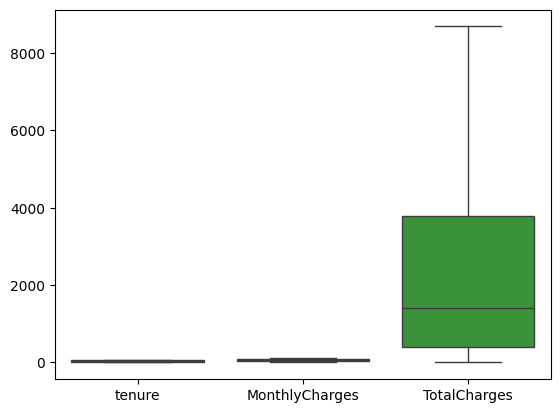

In [388]:
sns.boxplot(data=df)

In [389]:
df.OnlineBackup.value_counts()

OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64

In [390]:
df.MultipleLines.value_counts()

MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64

### ChurnRate Analysis

In [392]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [393]:
import plotly.express as px

fig=px.pie(df,names='Churn',color='Churn',
           color_discrete_map=({'Yes':'Red',
                                 'No':'Green'}))
fig.show()

In [394]:
ChurnData=df[df.Churn=='Yes']
ChurnData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,No,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer,103.70,5036.30,Yes


In [395]:
fig=px.sunburst(ChurnData,path=["SeniorCitizen",'InternetService',
                                        "Contract", "PaymentMethod"])
fig.show()

In [396]:
employee=df.drop('customerID',axis=1)

In [397]:
employee_num=employee.select_dtypes(include=np.number)
employee_num

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [398]:
employee_dummies=employee.select_dtypes(include='object')
employee_dummies

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,No
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card,No
7040,Female,No,Yes,Yes,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


### Converting Quality Variable to Number

In [400]:
from sklearn.preprocessing import LabelEncoder
employee_dummies=employee_dummies.apply(LabelEncoder().fit_transform)
employee_dummies

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,0
1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,3,0
2,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,1
3,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,3,0
7039,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0
7040,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,2,0
7041,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,3,1


In [401]:
employee_combined=pd.concat([employee_num,employee_dummies],axis=1)
employee_combined

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,29.85,29.85,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,3,0
2,2,53.85,108.15,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,1
3,45,42.30,1840.75,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,3,0
7039,72,103.20,7362.90,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0
7040,11,29.60,346.45,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,2,0
7041,4,74.40,306.60,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,3,1


### Data partition

In [403]:
from sklearn.model_selection import train_test_split
x= employee_combined.drop('Churn',axis=1)
y=employee_combined['Churn']

X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=99)

In [404]:
y_train.head()

2576    0
6642    0
5380    1
2517    1
2969    0
Name: Churn, dtype: int64

In [405]:
Train=pd.concat([X_train,y_train],axis=1)
Train.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
2576,53,108.25,5935.10,0,0,1,1,1,0,1,0,1,1,1,1,1,0,1,0,0
6642,25,79.00,1902.00,1,0,0,0,1,0,0,1,1,0,1,1,1,0,1,3,0
5380,2,80.25,144.55,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,2,1
2517,1,69.50,69.50,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1
2969,65,109.30,7337.55,0,0,1,1,1,1,1,1,0,1,1,1,1,2,0,2,0


In [406]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector as sfs

logreg=LogisticRegression()
Model=sfs(logreg,n_features_to_select=5,direction='backward',scoring='accuracy',cv=5)
Model.fit(X_train,y_train)

C:\Users\hp\anaconda3\envs\linear_env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\hp\anaconda3\envs\linear_env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to t

AttributeError: 'bool' object has no attribute 'all'

AttributeError: 'bool' object has no attribute 'all'

SequentialFeatureSelector(direction='backward', estimator=LogisticRegression(),
                          n_features_to_select=5, scoring='accuracy')

In [407]:
Model.feature_names_in_

array(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype=object)

In [408]:
Model.get_feature_names_out()

array(['tenure', 'MonthlyCharges', 'OnlineSecurity', 'TechSupport',
       'PaperlessBilling'], dtype=object)

In [409]:
X_train=X_train.loc[:,['tenure', 'MonthlyCharges', 'OnlineSecurity', 'TechSupport',
       'PaperlessBilling']]
X_train.head()

,tenure,MonthlyCharges,OnlineSecurity,TechSupport,PaperlessBilling
2576,53,108.25,0,1,1
6642,25,79.00,1,1,1
5380,2,80.25,0,0,1
2517,1,69.50,0,0,1
2969,65,109.30,1,1,0


In [410]:
y_train.shape

(4930,)

In [411]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(max_iter=1000)

Model3=logreg.fit(X_train,y_train)

In [412]:
Model3.intercept_

array([-1.98254896])

In [413]:
Model3.coef_

array([[-0.04795441,  0.03203368, -0.65112892, -0.67686675,  0.60196737]])

In [414]:
Model3.feature_names_in_

array(['tenure', 'MonthlyCharges', 'OnlineSecurity', 'TechSupport',
       'PaperlessBilling'], dtype=object)

In [415]:
Train=pd.concat([X_train,y_train],axis=1)
Train.head()

,tenure,MonthlyCharges,OnlineSecurity,TechSupport,PaperlessBilling,Churn
2576,53,108.25,0,1,1,0
6642,25,79.00,1,1,1,0
5380,2,80.25,0,0,1,1
2517,1,69.50,0,0,1,1
2969,65,109.30,1,1,0,0


In [416]:
Train['probability']=Model3.predict_proba(X_train)[:,1]
Train.head()

,tenure,MonthlyCharges,OnlineSecurity,TechSupport,PaperlessBilling,Churn,probability
2576,53,108.25,0,1,1,0,0.243905
6642,25,79.00,1,1,1,0,0.201527
5380,2,80.25,0,0,1,1,0.749174
2517,1,69.50,0,0,1,1,0.689505
2969,65,109.30,1,1,0,0,0.050869


In [417]:
Train['predicted']=np.where(Train['probability']>=0.7,1,0)
Train.head()

,tenure,MonthlyCharges,OnlineSecurity,TechSupport,PaperlessBilling,Churn,probability,predicted
2576,53,108.25,0,1,1,0,0.243905,0
6642,25,79.00,1,1,1,0,0.201527,0
5380,2,80.25,0,0,1,1,0.749174,1
2517,1,69.50,0,0,1,1,0.689505,0
2969,65,109.30,1,1,0,0,0.050869,0


In [418]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(Train['predicted'],Train['Churn'])
matrix

array([[3553, 1061],
       [  69,  247]])

In [419]:
from sklearn.metrics import classification_report
report=classification_report(Train['predicted'],Train['Churn'])
print(report)

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      4614
           1       0.19      0.78      0.30       316

    accuracy                           0.77      4930
   macro avg       0.58      0.78      0.58      4930
weighted avg       0.93      0.77      0.83      4930



Accuracy of Model is 77%,Hence Model is good Fit
Accuracy of Bad Customer Capture by Model is 78% ( Sensitivity )
Accuracy of Good Customer Capture by Model is 77% (Specificity)

### Prediction on test data

In [422]:
X_test=X_test.loc[:,['tenure', 'MonthlyCharges', 'OnlineSecurity', 'TechSupport',
       'PaperlessBilling']]

In [423]:
Test=pd.concat([X_test,y_test],axis=1)
Test.head()

,tenure,MonthlyCharges,OnlineSecurity,TechSupport,PaperlessBilling,Churn
2905,21,79.20,0,1,0,0
6651,29,67.45,1,1,0,0
5321,69,106.40,1,1,1,0
4293,14,89.80,0,0,1,1
5686,6,85.15,1,0,1,1


In [424]:
Test['probability']=Model3.predict_proba(X_test)[:,1]
Test.head()

,tenure,MonthlyCharges,OnlineSecurity,TechSupport,PaperlessBilling,Churn,probability
2905,21,79.20,0,1,0,0,0.244273
6651,29,67.45,1,1,0,0,0.073064
5321,69,106.40,1,1,1,0,0.068558
4293,14,89.80,0,0,1,1,0.695229
5686,6,85.15,1,0,1,1,0.600664


In [425]:
Test['prediction']=np.where(Test['probability']>=0.7,1,0)
Test.head()

,tenure,MonthlyCharges,OnlineSecurity,TechSupport,PaperlessBilling,Churn,probability,prediction
2905,21,79.20,0,1,0,0,0.244273,0
6651,29,67.45,1,1,0,0,0.073064,0
5321,69,106.40,1,1,1,0,0.068558,0
4293,14,89.80,0,0,1,1,0.695229,0
5686,6,85.15,1,0,1,1,0.600664,0


In [426]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(Test['prediction'],Test['Churn'])
print(matrix)

[[1526  445]
 [  26  116]]


In [427]:
from sklearn.metrics import classification_report
report=classification_report(Test['prediction'],Test['Churn'])
print(report)

              precision    recall  f1-score   support

           0       0.98      0.77      0.87      1971
           1       0.21      0.82      0.33       142

    accuracy                           0.78      2113
   macro avg       0.60      0.80      0.60      2113
weighted avg       0.93      0.78      0.83      2113



### Finished

### Business Submission

In [430]:
Model_Values = pd.DataFrame(Model3.intercept_,index=['Intercept'],columns=['Coefficient'])
Model_Values

,Coefficient
Intercept,-1.982549


In [433]:
abc=pd.DataFrame(Model3.coef_.T,index=Model3.feature_names_in_,columns=['Coefficient'])
abc

,Coefficient
tenure,-0.047954
MonthlyCharges,0.032034
OnlineSecurity,-0.651129
TechSupport,-0.676867
PaperlessBilling,0.601967


In [439]:
Details=pd.concat([Model_Values,abc])
Details

,Coefficient
Intercept,-1.982549
tenure,-0.047954
MonthlyCharges,0.032034
OnlineSecurity,-0.651129
TechSupport,-0.676867
PaperlessBilling,0.601967


Text(0.5, 1.0, 'Receiver operating characteristic')

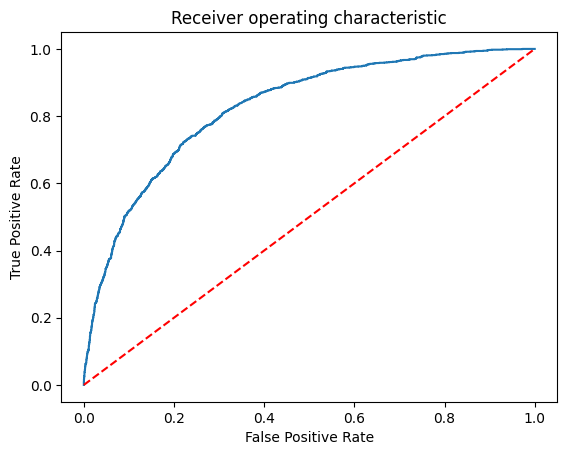

In [441]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds= roc_curve(y_train, Model3.predict_proba(X_train)[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')


In [445]:
auc=roc_auc_score(Train.predicted,Train.Churn)
print("auc score:",auc)

auc score: 0.7758466252956056
